In [1]:
import numpy as np
import tensorflow as tf
sess = tf.Session()

C:\Users\Royce\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
# IOU的计算过程
def IOU(gt_boxes, anchors):
    """
    计算GTs与Anchors之间的两两IOU
    gt_boxes:（nums，4）
    anchors:（nums，4）
    """
    gt_boxes = tf.expand_dims(gt_boxes, axis=0)
    anchors = tf.expand_dims(anchors, axis=1)
    #
    overlap_h = tf.maximum(0.0, tf.minimum(gt_boxes[...,2], anchors[...,2]) - tf.maximum(gt_boxes[...,0], anchors[...,0]))
    overlap_w = tf.maximum(0.0, tf.minimum(gt_boxes[...,3], anchors[...,3]) - tf.maximum(gt_boxes[...,1], anchors[...,1]))
    #
    square_gt = (gt_boxes[...,2]-gt_boxes[...,0]) * (gt_boxes[...,3]-gt_boxes[...,1])
    square_ac = (anchors[...,2]-anchors[...,0]) * (anchors[...,3]-anchors[...,1])
    # 
    jiaoji = overlap_h * overlap_w
    bingji = square_gt + square_ac - jiaoji
    #
    return tf.divide(jiaoji, bingji)

img size 大小为：(326, 550, 3)
IOU为：
[[0.54126    0.        ]
 [0.         0.71606296]]


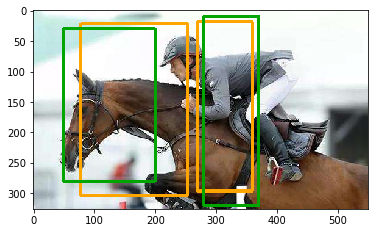

In [9]:
# 测试
from skimage import io
from matplotlib import pyplot as plt
import cv2
img_path = r'C:\Users\Royce\Desktop\time.jpg' 
img = io.imread(img_path)
if img.ndim != 3:
    img = skimage.color.gray2rgb(img)
print('img size 大小为：{}'.format(img.shape))
# boxes样例
boxes_a = np.array([[78,22,253,304],[269,19,360,296]])
boxes_b = np.array([[50,30,200,280],[280,10,370,320]])
# 转换为tensor
boxes_a = tf.constant(boxes_a, dtype = tf.float32)
boxes_b = tf.constant(boxes_b, dtype = tf.float32)

ious_tf = IOU(boxes_a, boxes_b)
print('IOU为：\n{}'.format(sess.run(ious_tf)))
for a in boxes_a.eval(session=sess):
    x1,y1,x2,y2 = a
    bbox = cv2.rectangle(img,(x1,y1),(x2,y2),(255, 165, 0),3)
for a in boxes_b.eval(session=sess):
    x1,y1,x2,y2 = a
    bbox = cv2.rectangle(img,(x1,y1),(x2,y2),(0, 165, 0),3)
plt.imshow(bbox)